<a href="https://colab.research.google.com/github/t-nakatani/signate_stu22/blob/main/signate_stu_v0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


https://www.kaggle.com/code/sanabdriss/nlp-extract-skills-from-job-descriptions

①データサイエンティスト（DS）  
②機械学習エンジニア（ML Engineer）  
③ソフトウェアエンジニア（Software Engineer）  
④コンサルタント（Consultant）   

In [55]:
jobdic = dict(zip([1, 2, 3, 4], ['DataScientist', 'ML Engineer', 'Software Engineer', 'Consultant']))
jobdic

{1: 'DataScientist', 2: 'ML Engineer', 3: 'Software Engineer', 4: 'Consultant'}

In [56]:
ROOT = "/content/drive/MyDrive/Colab Notebooks/signate/"

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [58]:
#学習用データと評価用データの読み込み
train = pd.read_csv(os.path.join(ROOT, "train.csv"))
test = pd.read_csv(os.path.join(ROOT, "test.csv"))

In [59]:
train

,id,description,jobflag
0,0,<li>Develop cutting-edge web applications that...,3
1,1,"<li> Designs and develops high quality, scalab...",3
2,2,<li>Functions as a point person for Network St...,4
3,3,"<li> Work on the technical design, development...",3
4,4,<li>Quantify the resources required for a task...,4
...,...,...,...
1511,1511,"<li>Support detailed reporting, statistical an...",1
1512,1512,<li>Collaborate with teams to support the ML t...,2
1513,1513,<li> Work with executives and other business l...,1
1514,1514,<li>Leading design ideation sessions to ensure...,3


In [60]:
test

,id,description
0,1516,<li>Building decision-making models and propos...
1,1517,<li>Educate homeowners on the benefits of sola...
2,1518,"<li><span>Design, develop, document, and imple..."
3,1519,<li>Apply advanced technical expertise and ski...
4,1520,<li>Project manage and deliver against our roa...
...,...,...
1512,3028,<li> Manages the development of interface requ...
1513,3029,<li>Lead the implementation of new statistical...
1514,3030,<li>Configure Zuora to fulfill use cases</li><...
1515,3031,"<li>Gather, translate, and document stakeholde..."


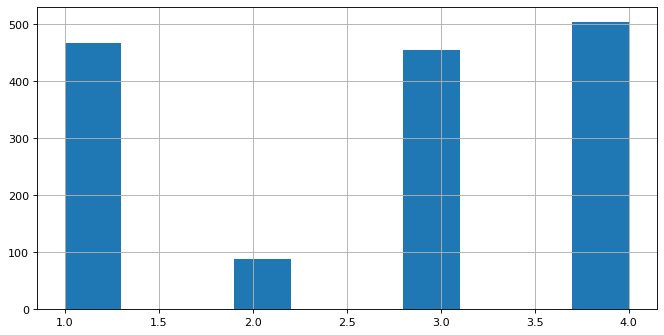

In [61]:
fig=plt.figure(figsize=(10, 5), dpi= 80, facecolor='w', edgecolor='k')
train.jobflag.hist()

In [62]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from textblob import Word
import re

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [63]:
## Lower case
test['description'] = test['description'].apply(lambda x: " ".join(x.lower() for x in x.split()))
## remove tabulation and punctuation
test['description'] = test['description'].str.replace('[^\w\s]',' ')
## digits
test['description'] = test['description'].str.replace('\d+', '')

#remove stop words
stop = stopwords.words('english')
test['description'] = test['description'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

## lemmatization
test['description'] = test['description'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

print("Preprocessed data: \n")
print(test.head())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  


Preprocessed data: 

     id                                        description
0  1516  li building decision making model proposing so...
1  1517  li educate homeowner benefit solar energy li l...
2  1518  li span design develop document implement web ...
3  1519  li apply advanced technical expertise skill im...
4  1520  li project manage deliver roadmap li li collab...


In [92]:
test['jobflag'] = -1
combined = train.append(test, ignore_index=True)

In [93]:
import re
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

def cleaning(texts):
    clean_texts = []
    for text in texts:
        # htmlタグを削除
        text = remove_tag(text)
        #アルファベット以外をスペースに置き換え
        clean_punc = re.sub(r'[^a-zA-Z]', ' ', text)
        #単語長が3文字以下のものは削除する
        clean_short_tokenized = [word for word in clean_punc.split() if len(word) > 3]
        #ステミング
        # clean_normalize = [stemmer.stem(word) for word in clean_short_tokenized]
        #単語同士をスペースでつなぎ, 文章に戻す
        # clean_text = ' '.join(clean_normalize)
        clean_text = ' '.join(clean_short_tokenized)
        
        clean_texts.append(clean_text)
    return clean_texts

def remove_tag(x):
    p = re.compile(r"<[^>]*?>")
    return p.sub('',x)

combined_cleaned = combined.copy()
combined_cleaned['description'] = cleaning(combined['description'])

In [94]:
combined_cleaned

,id,description,jobflag
0,0,Develop cutting edge applications that perform...,3
1,1,Designs develops high quality scalable efficie...,3
2,2,Functions point person Network Strategy work R...,4
3,3,Work technical design development release depl...,3
4,4,Quantify resources required task project relat...,4
...,...,...,...
3028,3028,manages development interface requirement inte...,-1
3029,3029,lead implementation statistical modeling capab...,-1
3030,3030,configure zuora fulfill case identify area com...,-1
3031,3031,gather translate document stakeholder requirem...,-1



*** Software Engineer ***



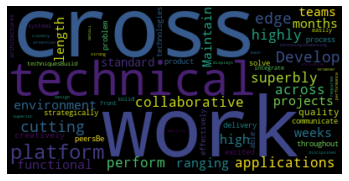


*** Consultant ***



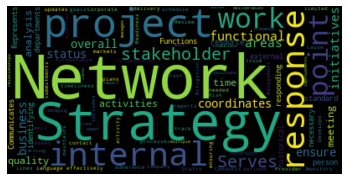


*** DataScientist ***



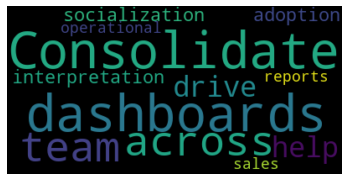


*** ML Engineer ***



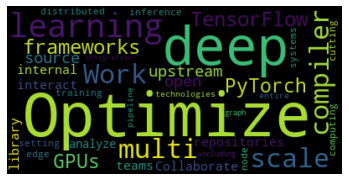

In [69]:
from wordcloud import WordCloud

## Visualize data
jobs_list = combined_cleaned.jobflag.unique().tolist()
for job in jobs_list[:-1]:

    # Start with one review:
    text = combined_cleaned[combined_cleaned.jobflag == job].iloc[0].description
    # Create and generate a word cloud image:
    wordcloud = WordCloud().generate(text)
    print("\n***",jobdic[int(job)],"***\n")
    # Display the generated image:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

In [ ]:
## Delete more stop words
# other_stop_words = ['junior', 'senior','experience','etc','job','work','company','technique',
#                     'candidate','skill','skills','language','menu','inc','new','plus','years',
#                    'technology','organization','ceo','cto','account','manager','data','scientist','mobile',
#                     'developer','product','revenue','strong']

# test['description'] = test['description'].apply(lambda x: " ".join(x for x in x.split() if x not in other_stop_words))

In [76]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

In [77]:
vectorizer = TfidfVectorizer()

X = vectorizer.fit_transform(train.description)
y = train.jobflag
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=109) 
clf = MultinomialNB()
clf.fit(X_train, y_train)

y_predicted = clf.predict(X_test)

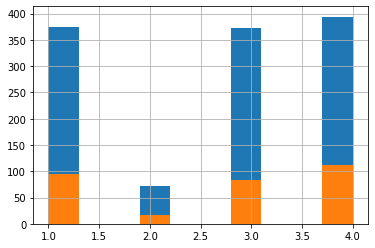

In [78]:
y_train.hist()
y_test.hist()

In [79]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [80]:
print("Accuracy score is: ",accuracy_score(y_test, y_predicted))
print("Classes: (to help read Confusion Matrix)\n", clf.classes_)
print("Confusion Matrix: ")

print(confusion_matrix(y_test, y_predicted))
print("Classification Report: ")
print(classification_report(y_test, y_predicted))

Accuracy score is:  0.7138157894736842
Classes: (to help read Confusion Matrix)
 [1 2 3 4]
Confusion Matrix: 
[[46  0  9 39]
 [ 6  0  6  4]
 [ 1  0 72 10]
 [ 9  0  3 99]]
Classification Report: 
              precision    recall  f1-score   support

           1       0.74      0.49      0.59        94
           2       0.00      0.00      0.00        16
           3       0.80      0.87      0.83        83
           4       0.65      0.89      0.75       111

    accuracy                           0.71       304
   macro avg       0.55      0.56      0.54       304
weighted avg       0.69      0.71      0.68       304



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [97]:
X = vectorizer.fit_transform(combined_cleaned.description)
X.shape

(3033, 10051)

In [100]:
X[combined_cleaned.jobflag==-1]

<1517x10051 sparse matrix of type '<class 'numpy.float64'>'
	with 61912 stored elements in Compressed Sparse Row format>

In [101]:
vectorizer = TfidfVectorizer()

X = vectorizer.fit_transform(combined_cleaned.description)
X_train = X[combined_cleaned.jobflag !=-1]
X_test = X[combined_cleaned.jobflag ==-1]
y_train = train.jobflag

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=109) 
# X_test = vectorizer.fit_transform(test.description)
clf = MultinomialNB()
clf.fit(X_train, y_train)

y_predicted = clf.predict(X_test)

In [103]:
y_predicted.shape

(1517,)

In [118]:
df_submit = pd.DataFrame([[id, pred] for id, pred in zip(test.id, y_predicted)])
df_submit.to_csv(os.path.join(ROOT, 'v0_submit.csv'), index=None, header=None)

In [121]:
df_submit_check = pd.read_csv(os.path.join(ROOT, 'v0_submit.csv'))
df_submit_check

,1516,1
0,1517,4
1,1518,3
2,1519,4
3,1520,3
4,1521,1
...,...,...
1511,3028,3
1512,3029,1
1513,3030,3
1514,3031,4


In [112]:
df_sample = pd.read_csv(os.path.join(ROOT, 'submit_sample.csv'))

In [113]:
df_sample

,1516,1
0,1517,1
1,1518,1
2,1519,1
3,1520,1
4,1521,1
...,...,...
1511,3028,1
1512,3029,1
1513,3030,1
1514,3031,1


0.5190641